# Statystyczna analiza danych

In [26]:
# @title
from IPython.display import display, HTML

pretty_header = """
<div style="
    margin-top: 40px;
    padding: 20px 10px;
    text-align: center;
    font-family: 'Segoe UI', sans-serif;
    color: #2c3e50;
">

    <h1 style="
        font-size: 28px;
        margin-bottom: 10px;
        background: linear-gradient(90deg, #1d70b8, #00a8e8);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-weight: 700;
    ">
        Statystyczna Analiza Danych
    </h1>

    <h2 style="
        font-size: 20px;
        font-weight: 400;
        margin-top: 0;
        color: #555;
    ">
        Kierunek: Sztuczna Inteligencja i Automatyzacja Procesów Biznesowych w ujęciu technicznym
    </h2>

    <p style="
        font-size: 16px;
        margin-top: 15px;
    ">
        Projekt słuchaczy studiów podyplomowych
    </p>

    <p style="
        font-size: 16px;
        font-style: italic;
        margin-bottom: 0;
    ">
        Autorzy (kolejność alfabetyczna):
    </p>
    <p style="font-size: 16px; font-weight: 500;">
        Kinga Kaza, Krzysztof Lachs, Joanna Mackiewicz
    </p>
</div>
"""

display(HTML(pretty_header))


# 📚 Spis Treści

1. [Wprowadzenie](#wprowadzenie)
2. [Import bibliotek i danych](#import-bibliotek-i-danych)
3. [Import danych](#import-danych)
4. [Diagnostyka danych](#diagnostyka-danych)
    - [Podstawowe statystyki](#podstawowe-statystyki)
    - [Wizualizacje](#wizualizacje)
5. [Przygotowanie danych](#przygotowanie-danych)
6. [Budowa modelu](#budowa-modelu)
    - [Podział na zbiór treningowy i testowy](#podział-na-zbiór-treningowy-i-testowy)
    - [Uczenie modelu](#uczenie-modelu)
    - [Ewaluacja](#ewaluacja)
7. [Wnioski](#wnioski)
8. [Dalsze kroki](#dalsze-kroki)

---

> ⬆️ Kliknij linki, aby przejść do wybranej sekcji

## Wprowadzenie

Tematem projektu jest analiza zbioru danych dotyczących szczęścia na świecie. Wykorzystamy w tym celu  raport World Happiness Report, który jest dostępny na platformie Kaggle.
Zbiór danych zawiera informacje o poziomie szczęścia w różnych krajach na świecie, a także różne czynniki wpływające na to szczęście, takie jak PKB na mieszkańca, wsparcie społeczne,
oczekiwana długość życia w zdrowiu, poczucie wolności w podejmowaniu życiowych decyzji, hojność oraz postrzeganie korupcji.
World Hapoiness Report (Raport Światowego Szczęścia) to globalne badanie opinii na temat poziomu zadowolenia z życia na świecie.
Wyniki raportu opierają się na danych pochodzących z Gallup World Poll. Głównym źródłem jest odpowiedź na tzw. "drabinę Cantrila", w której respondenci proszeni są o ocenę swojego życia w skali od 0 do 10, gdzie 10 oznacza najlepsze możliwe życie, a 0 – najgorsze.
Wartości te porównywane są do fikcyjnego kraju o nazwie Dystopia, który stanowi punkt odniesienia z najniższymi wynikami we wszystkich tych kategoriach (czynniki te nie wpływają bezpośrednio na końcową ocenę kraju).

Korzystając z tego zbioru danych, przeprowadzimy analizę statystyczną i wizualizację danych, aby lepiej zrozumieć, jakie czynniki wpływają na poziom szczęścia w różnych krajach.
Rozpatrzymy również te dane w kontekście różnych regionów świata, sytuacji politycznej i gospodarczej, a także innych czynników społecznych i kulturowych panujących w danym kraju
w analizowanym okresie czasu.
Na koniec spróbujemy znaleźć odpowiedź na pyatnie w jaki sposób pandemia COVID-19 wpłynęła na poziom szczęścia w różnych krajach i regionach świata.


Najpierw zainstalujemy bibliotekę kagglehub, która umożliwia pobieranie zbiorów danych z platformy Kaggle oraz poznane na wykładach bilibioteki wspomagających analizę
i wizualizację danych w pythonie.

## Opis kolumn

In [44]:
from IPython.display import display, HTML

tech_box_html = """
<div style='
    background-color: #f9f9f9;
    border-left: 6px solid #007acc;
    padding: 20px;
    margin-top: 20px;
    font-family: "Segoe UI", sans-serif;
    font-size: 15px;
    line-height: 1.6;
    color: #333333;
'>
  <strong style='font-size: 18px;'>📦 Ramka techniczna: Szczegółowe informacje o predyktorach uwzględnionych w naszej analizie </strong><br><br>
  <ol>
    <li><strong>PKB per capita</strong> (PPP, stałe dolary z 2017 r.) pochodzi z bazy WDI Banku Światowego (16.12.2021). Dane za 2021 r. uzupełniono prognozami OECD lub Banku Światowego, skorygowanymi o przyrost ludności. W analizie zastosowano logarytm PKB per capita.</li>
    <li><strong>Oczekiwana długość życia w zdrowiu</strong> została oszacowana na podstawie danych WHO dla lat 2000, 2010, 2015, 2019, z zastosowaniem interpolacji i ekstrapolacji.</li>
    <li><strong>Wsparcie społeczne</strong>: średnia odpowiedzi (0/1) na pytanie GWP o możliwość uzyskania pomocy od bliskich w razie potrzeby.</li>
    <li><strong>Swoboda wyboru</strong>: średnia odpowiedzi (0/1) na pytanie GWP o zadowolenie z możliwości decydowania o własnym życiu.</li>
    <li><strong>Hojność</strong>: reszta regresji odpowiedzi na pytanie o darowiznę w ostatnim miesiącu na log PKB per capita.</li>
    <li><strong>Postrzeganie korupcji</strong>: średnia odpowiedzi (0/1) na pytania o korupcję w rządzie i biznesie. Przy braku danych rządowych – wykorzystano dane dot. biznesu.</li>
  </ol>
</div>
"""

display(HTML(tech_box_html))



## Import bibliotek i danych

In [45]:
# Import najważniejszych bibliotek
import pandas as pd  # praca z danymi tabelarycznymi (DataFrame)
import numpy as np  # obliczenia matematyczne i tablice
import matplotlib.pyplot as plt  # tworzenie wykresów
import seaborn as sns  # atrakcyjne wizualizacje
import scipy.stats as stats  # testy statystyczne
import math  # funkcje matematyczne
import kagglehub  # pobieranie datasetu z Kaggle (jeśli zainstalowany)
from matplotlib.ticker import MaxNLocator  # wymuszanie całkowitych wartości na osiach



# Zaimportowanie ramek danych z Kaggle
path = kagglehub.dataset_download("mathurinache/world-happiness-report")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\krzys\.cache\kagglehub\datasets\mathurinache\world-happiness-report\versions\2


## Diagnostyka danych

In [9]:
from IPython.display import display

# Zakładamy, że masz dfs jako słownik {rok: df}
lata = sorted(dfs.keys())

# === 🔹 1. Podgląd danych (head) ===
print("🔹 === PODGLĄD DANYCH (head) ===")
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].head())

# === 🔹 2. Statystyki opisowe ===
print("\n🔹 === STATYSTYKI OPISOWE (describe) ===")
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].describe())

# === 🔹 3. Liczba brakujących wartości ===
print("\n🔹 === BRAKUJĄCE WARTOŚCI (nulls per column) ===")
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].isnull().sum())

# === 🔹 4. Liczba unikalnych wartości ===
print("\n🔹 === LICZBA UNIKALNYCH WARTOŚCI (nunique) ===")
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].nunique())

# === 🔹 5. Typy danych ===
print("\n🔹 === TYPY DANYCH (dtypes) ===")
for rok in lata:
    print(f"\n📅 ROK {rok}")
    print(dfs[rok].dtypes)

# === 🔹 6. Liczba duplikatów ===
print("\n🔹 === DUPLIKATY ===")
for rok in lata:
    print(f"\n📅 ROK {rok}: {dfs[rok].duplicated().sum()} duplikatów")

# === 🔹 7. Kształt danych ===
print("\n🔹 === KSZTAŁT DANYCH (shape) ===")
for rok in lata:
    print(f"📅 ROK {rok}: {dfs[rok].shape[0]} wierszy, {dfs[rok].shape[1]} kolumn")

NameError: name 'dfs' is not defined

W celu przeprowadzenia analizy szczęścia na świecie w latach 2015 - 2022 wczytamy ramki danych, a nastepnie je połączymy i umieścimy ją w jednym slowniku.

In [47]:
years = range(2015, 2023)  # Lata od 2015 do 2022 (bo range kończy przed 2023)
dfs = {}  # Pusty słownik do przechowywania DataFrame'ów

# Iteracja po latach, wczytywanie odpowiedniego pliku CSV do słownika
for year in years:
    dfs[year] = pd.read_csv(f"{path}/{year}.csv")  # Wczytaj plik np. '2015.csv' jako DataFrame


W następnym punkcie przeanalizujemy zbiór danych w celu wybrana danych przydatnych do analizy interesujących nas problemów oraz ujednolicenia tych danych.
Dokonamy również czyszczenia i identyfikacji braków danych.   

In [ ]:
# ToDo:
# Opis datasetow - co mamy? Opis kolumn.
# Opisanie metody Cantril Ladder
# Histogramy Happiness Score
# Datasety w czasach COVID-19


Koniecznosc operacji masowach, poniewaz mamy wiele ramek danych. Dlatego wiele operacji bedzie wykonywanych w petlach

## Czyszczenie i porządkowanie danych

In [31]:
#ToDo:
# Ujednolicenie nazw kolumn i kolejnosc
# Dopasowanie typów danych
# Uzupełnienie brakujących danych

### Przejrzymy nazwy kolumn

In [ ]:
from IPython.display import display, HTML

summary_data = []

# Iteracja po słowniku dfs: kluczem jest rok, wartością DataFrame
for year, df in dfs.items():
    if isinstance(df, pd.DataFrame):  # Upewniamy się, że to prawidłowy DataFrame
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": len(df.columns),  # Ile kolumn zawiera
            "Nazwy kolumn": ", ".join(df.columns.tolist())  # Nazwy kolumn jako tekst
        })
    else:
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

# Tworzenie DataFrame z podsumowaniem
summary_df_str = pd.DataFrame(summary_data)  # Konwersja listy słowników do tabeli

# Stylowanie tabeli dla lepszej czytelności
styles = [
    dict(selector="th", props=[("text-align", "left")]),
    dict(selector="td", props=[("text-align", "left")]),
    dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
]

# Wyświetlenie stylizowanej tabeli
display(summary_df_str.style.set_table_styles(styles))


,Rok,Liczba kolumn,Nazwy kolumn
0,2015,12,"Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
1,2016,13,"Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
2,2017,12,"Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual"
3,2018,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
4,2019,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
5,2020,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
6,2021,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
7,2022,12,"RANK, Country, Happiness score, Whisker-high, Whisker-low, Dystopia (1.83) + residual, Explained by: GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption"


Wiele kolumn ma:

- identyczne znaczenie, ale różne nazwy (np. "Happiness Score" vs "Score" vs "Ladder score")

- różne formaty (np. "Trust..Government.Corruption." vs "Perceptions of corruption")

- różne style: CamelCase, snake_case, dot.notation

*Można* zauważyc, że dane nie są jednolite. w zależności od roku df posiada od 9 do 20 kolumn

## Sprawdzmy brakujace wartosci

Mozemy sobie albo to zwizualizowac:

NameError: name 'standard_columns' is not defined

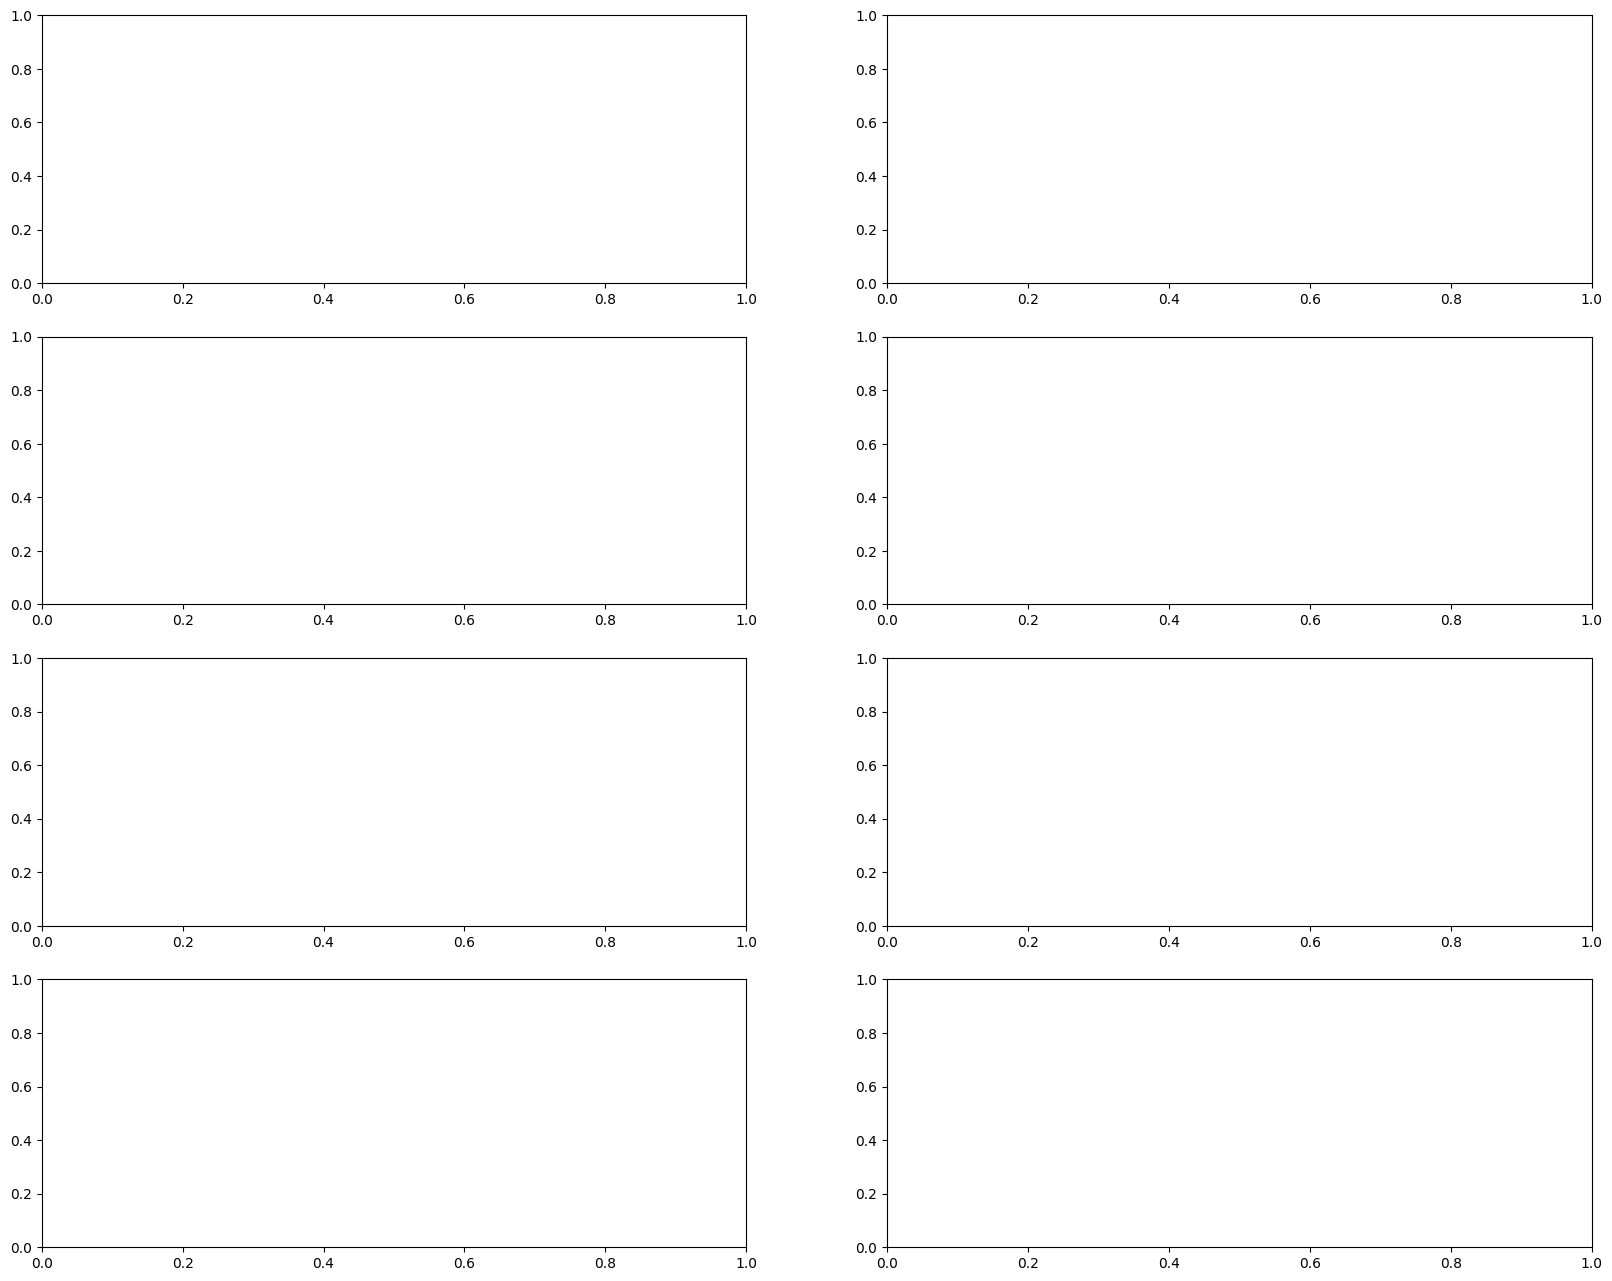

In [51]:
# Tworzenie subplotów
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
axes = axes.flatten()

# Iteracja po posortowanych latach
for i, year in enumerate(sorted(dfs.keys())):
    df = dfs[year].rename(columns=standard_columns)  # ujednolicenie nazw kolumn (jeśli jest mapa standard_columns)
    null_counts = df.isnull().sum()  # zliczenie braków danych

    axes[i].bar(null_counts.index, null_counts.values)  # wykres słupkowy braków
    axes[i].set_title(f'Braki danych w roku {year}')
    axes[i].tick_params(axis='x', rotation=90)  # obrót etykiet X
    axes[i].set_ylabel("Liczba braków")

plt.tight_layout()
plt.show()



### Albo opisac, z wyszczegolnieniem indeksow, gdzie brakuje wartosci

In [36]:
# Sprawdzanie brakujących wartości w każdym z DataFrame'ów
for name, df in dfs.items():
    # Oblicz sumę brakujących wartości dla każdej kolumny
    missing_values = df.isnull().sum()

    # Sprawdź, czy w ogóle istnieją jakieś brakujące wartości
    if missing_values.any():
        print(f"\nDataFrame '{name}' ma brakujące wartości w kolumnach:")
        # Wyświetl tylko te kolumny, w których brakuje danych
        print(missing_values[missing_values > 0])

        # Wyświetl indeksy brakujących wartości dla każdej takiej kolumny
        for col in missing_values[missing_values > 0].index:
            missing_indices = df[df[col].isnull()].index.tolist()
            print(f" → Kolumna '{col}': brakujące wartości w indeksach: {missing_indices}")

        print("-" * 60)  # Separator dla lepszej czytelności
    else:
        print(f"{name} nie ma brakujących wartości.")

print("\n--- Zakończono sprawdzanie brakujących wartości ---")

2015 nie ma brakujących wartości.
2016 nie ma brakujących wartości.
2017 nie ma brakujących wartości.

DataFrame '2018' ma brakujące wartości w kolumnach:
Perceptions of corruption    1
dtype: int64
 → Kolumna 'Perceptions of corruption': brakujące wartości w indeksach: [19]
------------------------------------------------------------
2019 nie ma brakujących wartości.
2020 nie ma brakujących wartości.
2021 nie ma brakujących wartości.

DataFrame '2022' ma brakujące wartości w kolumnach:
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64
 → Kolumna 'Hap

Zagladamy do ramki 2018. Tu brakuje danych o perception of corruption.

1. Średnia dla regionu	Użyj średniej Corruption dla krajów z tego samego regionu (np. Middle East and North Africa)	✅ Kontekst lokalny, 🟡 uśrednione
2. Średnia dla UAE z innych lat	Jeśli UAE występuje w innych latach, użyj ich średniej	✅ Wiarygodne, 🟡 tylko jeśli dane dostępne
3. Model regresji	Oszacuj wartość na podstawie innych zmiennych (GDP, Score, Support itd.)	✅ Dokładne, 🟡 bardziej złożone


Do tej brakujacej wartosci wrocimy po czyszczeniu danych

In [ ]:
dfs[2018].head(20)

Zagladamy do ramki z 2022 roku. Widzimy, ze w indeksie 146 jest pusta obserwacja, ktora mozna po prostu usunac

In [ ]:
dfs[2022]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [ ]:
# Usuwanie linijki z indeksu 146

dfs[2022].drop(index=146, inplace=True)

In [ ]:
dfs[2021]

,Year,Country name,Region,Happiness Rank,Happiness Score,Standard error,Upper whisker,Lower whisker,GDP per capita,Social support,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia residual
0,2021,Finland,Western Europe,1.0,7.842,0.032,7.904,7.780,10.775,0.954,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,2021,Denmark,Western Europe,2.0,7.620,0.035,7.687,7.552,10.933,0.954,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,2021,Switzerland,Western Europe,3.0,7.571,0.036,7.643,7.500,11.117,0.942,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,2021,Iceland,Western Europe,4.0,7.554,0.059,7.670,7.438,10.878,0.983,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,2021,Netherlands,Western Europe,5.0,7.464,0.027,7.518,7.410,10.932,0.942,...,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021,Lesotho,Sub-Saharan Africa,145.0,3.512,0.120,3.748,3.276,7.926,0.787,...,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,2021,Botswana,Sub-Saharan Africa,146.0,3.467,0.074,3.611,3.322,9.782,0.784,...,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,2021,Rwanda,Sub-Saharan Africa,147.0,3.415,0.068,3.548,3.282,7.676,0.552,...,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,2021,Zimbabwe,Sub-Saharan Africa,148.0,3.145,0.058,3.259,3.030,7.943,0.750,...,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205



DataFrame '2022' ma brakujące wartości w kolumnach:
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64
 → Kolumna 'Happiness score': brakujące wartości w indeksach: []
 → Kolumna 'Whisker-high': brakujące wartości w indeksach: []
 → Kolumna 'Whisker-low': brakujące wartości w indeksach: []
 → Kolumna 'Dystopia (1.83) + residual': brakujące wartości w indeksach: []
 → Kolumna 'Explained by: GDP per capita': brakujące wartości w indeksach: []
 → Kolumna 'Explained by: Social support': brakujące wartości w indeksach: []
 → Kolumna 'Explained by: Healthy 


## Ujednolicenia nazw kolumn

In [ ]:
# Krok 1: Zbieramy wszystkie unikalne nazwy kolumn z każdego DataFrame
all_columns = set()
for df in dfs.values():
    all_columns.update(df.columns)

# Przekształcamy na posortowaną listę dla przejrzystości
sorted_all_columns = sorted(all_columns)
sorted_all_columns



['Country',
 'Country name',
 'Dystopia residual',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Healthy life expectancy',
 'Ladder score in Dystopia',
 'Lower whisker',
 'Perceptions of corruption',
 'Region',
 'Social support',
 'Standard error',
 'Upper whisker',
 'Year']

In [ ]:
# Krok 2: Mapa ujednoliconych nazw kolumn
mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




In [ ]:
dfs[2020]

,Year,Country name,Region,Happiness Rank,Happiness Score,Standard error,Upper whisker,Lower whisker,GDP per capita,Social support,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia residual
0,2020,Finland,Western Europe,1.0,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,...,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,2020,Denmark,Western Europe,2.0,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,...,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,2020,Switzerland,Western Europe,3.0,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,...,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,2020,Iceland,Western Europe,4.0,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,2020,Norway,Western Europe,5.0,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,...,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,Sub-Saharan Africa,149.0,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,...,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,2020,Rwanda,Sub-Saharan Africa,150.0,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,...,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,2020,Zimbabwe,Sub-Saharan Africa,151.0,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,...,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,2020,South Sudan,Sub-Saharan Africa,152.0,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,...,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [ ]:
# Krok 3: Zastosowanie mapy nazw kolumn do wszystkich DataFrames
for year, df in dfs.items():
    # Zmieniamy tylko te kolumny, które są w mapie
    renamed_cols = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    dfs[year] = df.rename(columns=renamed_cols)

# Sprawdzenie: które standardowe kolumny są dostępne w każdym roku
column_presence = {
    year: sorted([col for col in df.columns if col in mapa_kolumn.values()])
    for year, df in dfs.items()
}

column_presence


{2015: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Standard error'],
 2016: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Upper whisker'],
 2017: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Social support',
  'Upper whisker'],
 2018: ['Country',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Social support'],
 2019: ['Country',
  'Freedom t

In [ ]:
dfs[2020]

,Year,Country,Region,Happiness Rank,Happiness Score,Standard error,Upper whisker,Lower whisker,GDP per capita,Social support,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia residual
0,2020,Finland,Western Europe,1.0,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,...,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,2020,Denmark,Western Europe,2.0,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,...,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,2020,Switzerland,Western Europe,3.0,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,...,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,2020,Iceland,Western Europe,4.0,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,2020,Norway,Western Europe,5.0,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,...,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,Sub-Saharan Africa,149.0,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,...,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,2020,Rwanda,Sub-Saharan Africa,150.0,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,...,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,2020,Zimbabwe,Sub-Saharan Africa,151.0,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,...,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,2020,South Sudan,Sub-Saharan Africa,152.0,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,...,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [ ]:
# Przetwarzanie każdego DataFrame w dfs
for rok, df in dfs.items():
    # 1. Zastosowanie mapy kolumn (ujednolicenie nazw)
    nowe_nazwy = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    df = df.rename(columns=nowe_nazwy)

    # 2. Usunięcie zduplikowanych kolumn (jeśli występują)
    df = df.loc[:, ~df.columns.duplicated()]

    # 3. Usunięcie istniejącej kolumny 'Year', jeśli już jest
    if 'Year' in df.columns:
        df = df.drop(columns='Year')

    # 4. Dodanie kolumny 'Year' na pierwszą pozycję
    df.insert(0, 'Year', rok)

    # 5. Aktualizacja ramki danych w słowniku
    dfs[rok] = df


In [ ]:
# Dodajemy kolumne Happiness Rank, jesli jej brakuje
for rok, df in dfs.items():
    if 'Happiness Score' in df.columns:
        # Obliczenie rankingu na podstawie Happines Score
        df['Happiness Rank'] = df['Happiness Score'].rank(ascending=False, method='min')

        # Wstaw kolumnę przed 'Happiness Score'
        kolumny = df.columns.tolist()
        kolumny.remove('Happiness Rank')
        index_score = kolumny.index('Happiness Score')
        kolumny.insert(index_score, 'Happiness Rank')
        df = df[kolumny]

        dfs[rok] = df

# Sprawdzenie dla roku 2021
dfs[2022]


,Year,Country,Happiness Rank,Happiness Score,Upper whisker,Lower whisker,Dystopia residual,GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,2022,Finland,1.0,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,Denmark,2.0,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,Iceland,3.0,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,Switzerland,4.0,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,Netherlands,5.0,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2022,Botswana*,142.0,"3,471","3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,Rwanda*,143.0,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,Zimbabwe,144.0,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,Lebanon,145.0,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


# Ujednolicenie nazw krajow

In [ ]:
# Krok 1: Zbieramy unikalne nazwy krajów z każdej ramki danych
kraje_na_rok = {
    rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items() if "Country" in df.columns
}

# Krok 2: Zbiór wszystkich unikalnych nazw krajów
wszystkie_kraje = sorted(set.union(*kraje_na_rok.values()))

# Krok 3: Macierz obecności krajów w poszczególnych latach
macierz_spojnosci_krajow = pd.DataFrame({
    rok: [kraj in kraje for kraj in wszystkie_kraje] for rok, kraje in kraje_na_rok.items()
}, index=wszystkie_kraje)

# Krok 4: Wybierz kraje, które nie występują we wszystkich 8 latach
niespojne_kraje_df = macierz_spojnosci_krajow[macierz_spojnosci_krajow.sum(axis=1) < len(dfs)]


In [ ]:
# Krok 1: Usuń gwiazdki z nazw krajów we wszystkich ramkach danych
for rok, df in dfs.items():
    if "Country" in df.columns:
        df["Country"] = df["Country"].str.replace("*", "", regex=False).str.strip()
        dfs[rok] = df

# Krok 2: Zbierz wszystkie unikalne kraje ze wszystkich lat (po usunięciu gwiazdek)
wszystkie_kraje = set()
for df in dfs.values():
    if "Country" in df.columns:
        wszystkie_kraje.update(df["Country"].dropna().unique())

# Posortowany zbiór unikalnych nazw krajów (do ręcznego mapowania)
wszystkie_kraje = sorted(wszystkie_kraje)

# Wyświetlenie jako DataFrame (np. do tworzenia mapy ujednolicającej)
kraje_df = pd.DataFrame({"Oryginalna nazwa": wszystkie_kraje})

In [ ]:
kraje_df

,Oryginalna nazwa
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
169,Venezuela
170,Vietnam
171,Yemen
172,Zambia


No charts were generated by quickchart


In [ ]:
# Mapa ręczna: ujednolicone oficjalne nazwy krajów
mapa_ujednolicenia_krajow = {
    # Congo warianty
    "Congo": "Republic of the Congo",  # zakładamy, że to Brazzaville
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",


    # Hong Kong
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong S.A.R., China": "Hong Kong",

    # Iran
    "Iran (Islamic Republic of)": "Iran",

    # Russia
    "Russia": "Russian Federation",

    # Palestine
    "Palestinian Territories": "Palestine",
    "Palestine": "Palestine",


    # Czech Republic
    "Czechia": "Czech Republic",


    # United States
    "United States": "United States of America",

    # Macedonia
    "North Macedonia": "Macedonia",


    # Taiwan
    "Taiwan Province of China": "Taiwan",

    # Trinidad i Tobago
    "Trinidad & Tobago": "Trinidad and Tobago",

    # Somalia
    "Somaliland region": "Somaliland",
    "Somaliland Region": "Somaliland"
}

# Zastosowanie ujednoliconego słownika do wszystkich ramek
for rok, df in dfs.items():
    if "Country" in df.columns:
        df["Country"] = df["Country"].replace(mapa_ujednolicenia_krajow)
        dfs[rok] = df

# Sprawdzenie na przykładzie 2021
dfs[2021].Country.unique()


array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic',
       'United States of America', 'Belgium', 'France', 'Bahrain',
       'Malta', 'Taiwan', 'United Arab Emirates', 'Saudi Arabia', 'Spain',
       'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore', 'Kosovo',
       'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Cyprus',
       'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland', 'Kazakhstan',
       'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius',
       'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Japan',
       'Argentina', 'Portugal', 'Honduras', 'Croatia', 'Philippines',
       'South Korea', 'Peru', 'Bosnia and Herzegovina', 'Moldova',
       'Ecuador', 'Kyrgyzstan', 'Greece', 'Bolivia', 'Mongolia',
       'Paraguay', 'Montenegro', 'Dom

In [ ]:
# Krok 1: Zbiór wszystkich krajów we wszystkich ramkach
zbiory_krajow = {rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items()}

# Krok 2: Kraje obecne we wszystkich latach (przecięcie)
kraje_we_wszystkich_latach = set.intersection(*zbiory_krajow.values())

# Krok 3: Lista krajów w jakimkolwiek roku (suma zbiorów)
wszystkie_kraje = set.union(*zbiory_krajow.values())

# Krok 4: Kraje nieobecne w co najmniej jednym roku
kraje_niekompletne = sorted(wszystkie_kraje - kraje_we_wszystkich_latach)

# Tabela krajów obecnych we wszystkich latach
df_kraje_wszystkie = pd.DataFrame(sorted(kraje_we_wszystkich_latach), columns=["Kraje obecne we wszystkich latach"])

# Tabela krajów niekompletnych
df_kraje_brakujace = pd.DataFrame(kraje_niekompletne, columns=["Kraje brakujące w co najmniej jednym roku"])



{2015: 138,
 2016: 138,
 2017: 138,
 2018: 138,
 2019: 138,
 2020: 138,
 2021: 138,
 2022: 138}

In [ ]:
len(kraje_stale)

138

In [ ]:
# Stwórz ramkę, która pokazuje obecność każdego kraju w poszczególnych latach
kraje_unikalne = sorted(set.union(*[set(df["Country"].dropna().unique()) for df in dfs.values()]))

# Tworzymy macierz obecności (kraj x rok)
spojnosc_krajow_df = pd.DataFrame(index=kraje_unikalne, columns=dfs.keys())

# Wypełniamy True/False w zależności od obecności kraju w danym roku
for rok, df in dfs.items():
    obecne_kraje = set(df["Country"].dropna().unique())
    spojnosc_krajow_df[rok] = spojnosc_krajow_df.index.isin(obecne_kraje)

# Które kraje występują tylko w jednym roku
kraje_tylko_w_jednym_roku = spojnosc_krajow_df.sum(axis=1)
kraje_tylko_w_jednym_roku = kraje_tylko_w_jednym_roku[kraje_tylko_w_jednym_roku == 1].index.tolist()

# Przekształć do dłuższego formatu, aby wskazać brakujące kraje per rok
braki = spojnosc_krajow_df[~spojnosc_krajow_df].stack().reset_index()
braki.columns = ["Country", "Year", "Brakuje"]

kraje_tylko_w_jednym_roku


['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']

In [ ]:
# Filtruj dane: tylko kraje, które występują we wszystkich latach
kraje_stale = spojnosc_krajow_df.index[spojnosc_krajow_df.all(axis=1)].tolist()

# Tworzymy nowe ramki danych tylko z tymi krajami
dfs_stale = {}
for rok, df in dfs.items():
    dfs_stale[rok] = df[df["Country"].isin(kraje_stale)].copy()

# Sprawdzenie liczby krajów w każdej nowej ramce
licznik_krajow_stalych = {rok: len(df) for rok, df in dfs_stale.items()}
licznik_krajow_stalych

{2015: 138,
 2016: 138,
 2017: 138,
 2018: 138,
 2019: 138,
 2020: 138,
 2021: 138,
 2022: 138}

In [ ]:
# Na podstawie danych z df `spojnosc_krajow_df`, policz ile lat brakuje każdemu krajowi
liczba_brakow = spojnosc_krajow_df.apply(lambda row: (~row).sum(), axis=1)

# Kraje, które mają dokładnie 1 brakujący rok
kraje_z_1_brakiem = liczba_brakow[liczba_brakow == 1].index.tolist()

# W których konkretnie latach brakuje tych krajów
braki_dla_krajow_1 = braki[braki["Country"].isin(kraje_z_1_brakiem)].sort_values(by=["Country", "Year"])


In [ ]:
braki_dla_krajow_1.Country

,Country
12,Burundi
38,Haiti
39,Laos
40,Lesotho
47,Mozambique
48,Namibia


In [ ]:
# Połącz listę krajów stałych (pełne dane) i tych z tylko jednym brakującym rokiem
kraje_do_analizy = sorted(set(kraje_stale).union(set(kraje_z_1_brakiem)))

# Stwórz ramkę z ostateczną listą krajów do analizy
df_kraje_do_analizy = pd.DataFrame(kraje_do_analizy, columns=["Kraje do analizy"])


In [ ]:
df_kraje_do_analizy

,Kraje do analizy
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
...,...
139,Venezuela
140,Vietnam
141,Yemen
142,Zambia


In [ ]:
dfs[2016]

,Year,Country,Region,Happiness Rank,Happiness Score,Lower whisker,Upper whisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia residual
0,2016,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2016,Benin,Sub-Saharan Africa,153.0,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,2016,Afghanistan,Southern Asia,154.0,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,2016,Togo,Sub-Saharan Africa,155.0,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,2016,Syria,Middle East and Northern Africa,156.0,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [ ]:
# Lista kolumn, które mają się znaleźć w finalnej ramce
kolumny_docelowe = [ "Year", "Country", "Region", "Happiness Rank", "Happiness Score", "GDP per capita",
    "Social support", "Healthy life expectancy", "Freedom to make life choices",
    "Perceptions of corruption", "Generosity"
]

# Budowa ramki do analizy
finalne_dane = []
for rok, df in dfs.items():
    df_filtr = df[df["Country"].isin(kraje_do_analizy)].copy()
    df_filtr = df_filtr[["Country"] + [col for col in kolumny_docelowe if col in df_filtr.columns]]
    df_filtr["Year"] = rok
    finalne_dane.append(df_filtr)

# Połączenie wszystkich lat w jedną ramkę
df_final = pd.concat(finalne_dane, ignore_index=True)

# Uporządkowanie kolumn w odpowiedniej kolejności
df_final = df_final[["Year"] + kolumny_docelowe]


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Nowa lista docelowych kolumn we właściwej kolejności
kolumny_docelowe_finalne = [
    "Year", "Country", "Happiness Rank", "Happiness Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption"
]

# Odbudowa danych z uwzględnieniem unikalnych kolumn i poprawnej kolejności
finalne_dane = []
for rok, df in dfs.items():
    df_filtr = df[df["Country"].isin(kraje_do_analizy)].copy()
    df_filtr["Year"] = rok
    df_filtr = df_filtr[[col for col in kolumny_docelowe_finalne if col in df_filtr.columns]]
    finalne_dane.append(df_filtr)

# Konkatenuj i ustaw kolejność kolumn
df_final = pd.concat(finalne_dane, ignore_index=True)
df_final = df_final[kolumny_docelowe_finalne]

In [ ]:
df_final

,Year,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2015,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,4.0,7.522,1.459,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...
1141,2022,Botswana,142.0,"3,471","1,503",NaN,NaN,NaN,NaN,NaN
1142,2022,Rwanda,143.0,"3,268","0,785",NaN,NaN,NaN,NaN,NaN
1143,2022,Zimbabwe,144.0,"2,995","0,947",NaN,NaN,NaN,NaN,NaN
1144,2022,Lebanon,145.0,"2,955","1,392",NaN,NaN,NaN,NaN,NaN


In [ ]:
dfs[2022]

,Year,Country,Happiness Rank,Happiness Score,Upper whisker,Lower whisker,Dystopia residual,GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,2022,Finland,1.0,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,Denmark,2.0,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,Iceland,3.0,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,Switzerland,4.0,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,Netherlands,5.0,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2022,Botswana,142.0,"3,471","3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,Rwanda,143.0,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,Zimbabwe,144.0,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,Lebanon,145.0,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [ ]:
dfs

In [ ]:
# Zapisz jako Excel w folderze roboczym Colab
df_final.to_excel("df_final.xlsx", index=False)

# Wyświetl link do pobrania
from google.colab import files
files.download("df_final.xlsx")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Wizualizacje

In [ ]:

# --- 1. Specify the column you want to plot ---
# IMPORTANT: Replace 'your_column_name' with the actual name of the column
# you want to generate a histogram for from each DataFrame.
column_to_plot = 'your_column_name' # <<< CHANGE THIS TO YOUR COLUMN NAME

# --- 2. Plotting Logic ---
if not 'df_list' in locals() or not df_list:
    print("It seems 'df_list' is not defined or is empty.")
    print("Please ensure your df_list is populated with DataFrames.")
else:
    num_dfs = len(df_list)

    if num_dfs == 0:
        print("Your df_list is empty. Nothing to plot!")
    else:
        # Define the number of rows for your subplot grid
        nrows = 4
        # Calculate the number of columns needed
        ncols = math.ceil(num_dfs / nrows)

        # Create the figure and subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

        # Flatten the axes array for easier iteration
        if num_dfs == 1:
            if not isinstance(axes, np.ndarray):
                axes_flat = [axes]
            else:
                axes_flat = axes.flatten()
        elif nrows == 1 or ncols == 1:
             axes_flat = axes if isinstance(axes, np.ndarray) else [axes] # Ensure it's iterable
             if isinstance(axes_flat, np.ndarray) and axes_flat.ndim > 1 : # if it was 1 row N cols or N rows 1 col
                 axes_flat = axes_flat.flatten()
        else:
            axes_flat = axes.flatten()

        print(f"Generating {num_dfs} histograms in a {nrows}x{ncols} grid for column '{column_to_plot}'.")

        for i, df in enumerate(df_list):
            ax = axes_flat[i]

            if column_to_plot in df.columns:
                sns.histplot(data=df, x=column_to_plot, ax=ax, kde=True)
                ax.set_title(f'DF {i+1}: {column_to_plot}', fontsize=10)
                ax.set_xlabel(column_to_plot, fontsize=8)
                ax.set_ylabel('Frequency', fontsize=8)
                ax.tick_params(axis='both', which='major', labelsize=7)
            else:
                ax.text(0.5, 0.5, f'Column "{column_to_plot}"\nnot found in DF {i+1}',
                        horizontalalignment='center', verticalalignment='center',
                        transform=ax.transAxes, fontsize=9, color='red')
                ax.set_title(f'DF {i+1}: Error', fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])

        # Hide any unused subplots
        for j in range(num_dfs, len(axes_flat)):
            fig.delaxes(axes_flat[j])

        plt.tight_layout(pad=2.0)
        plt.suptitle(f'Histograms of "{column_to_plot}" from {num_dfs} DataFrames (4 Rows)', fontsize=16, y=1.02)
        plt.show()

## Analiza opisowa

- przyjrzenie się krajom, ktore mają najwyższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają najniższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają największy wzrost wskaźnika szczęścia
- przyjrzenie się krajom, ktore mają największy spadek wskaźnika szczęścia
- czy COVID-19 miał wpływ na wskaźnik szczęścia?

## Wnioski